<p  style="text-align: center;"><font size="10">ECONOMICS IN 13 AFRICAN COUNTRIES</font></p>


This kernel looks at economics in 13 African countries from the year 1860 to 2014. By reviewing nine elements for each year, insight will gleaned into the countries' economic trends and potential influences. 

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of Contents</h3>

* <a href='1'>LIBRARIES & PACKAGES</a>
* <a href='2'>DATA OVERVIEW & INSIGHTS</a>
* <a href='3'>MISSING DATA</a>
* <a href='4'>EXPLORATORY DATA ANALYSIS</a>
* <a href='5'>CONCLUSION</a>

# <a id="1">I. LIBRARIES & PACKAGES</a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv


# <a id='2'>II. DATA OVERVIEW & INSIGHTS</a>

In [2]:
df = pd.read_csv('/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv')
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [3]:
df.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [5]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [6]:
df.shape

(1059, 14)

In [7]:
df['banking_crisis'] = df['banking_crisis'].replace({'crisis': 1, 'no_crisis':0})
df.head(25)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0
5,1,DZA,Algeria,1875,0,0.051546,0,0,0.0,-20.924178,0,0,0,0
6,1,DZA,Algeria,1876,0,0.051867,0,0,0.0,-1.769547,0,0,0,0
7,1,DZA,Algeria,1877,0,0.051867,0,0,0.0,29.116045,0,0,1,0
8,1,DZA,Algeria,1878,0,0.051948,0,0,0.0,-1.492537,0,0,0,0
9,1,DZA,Algeria,1879,0,0.052029,0,0,0.0,-16.831357,0,0,0,0


In [8]:
unique_countries = df['country'].unique()
unique_countries

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

# <a id='3'>III. MISSING DATA</a>

In [9]:
missing_percentage = df.isna().sum()
missing_percentage

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

# <a id="4">IV. EXPLORATORY DATA ANALYSIS</a>

### AVERAGE EXCHANGE RATE BY COUNTRY



In [10]:
exch_avg = df.groupby(['country'])[['exch_usd']].agg('mean').sort_values('exch_usd').reset_index()
exch_avg

,country,exch_usd
0,Egypt,1.006045
1,Zambia,1.116342
2,South Africa,1.719339
3,Morocco,5.865309
4,Mauritius,13.759661
5,Angola,15.099671
6,Algeria,20.177565
7,Zimbabwe,20.207800
8,Kenya,30.713180
9,Nigeria,38.951022


In [11]:
fig = go.Figure(data=[go.Bar(x=exch_avg['country'], y=exch_avg['exch_usd'],
                            name='Average Exchange Rate', marker_color='blue')])

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(title_text='Average Exchange Rate by Country',xaxis_title='Countries',
                 yaxis_title='Average Exchange Rate', title_x=0.5,barmode='stack')
fig.show()

### AVERAGE INFLATION RATE BY COUNTRY

In [12]:
infla_avg = df.groupby(['country'])[['inflation_annual_cpi']].agg('mean').sort_values('inflation_annual_cpi').reset_index()
infla_avg

,country,inflation_annual_cpi
0,Egypt,4.762431
1,South Africa,5.190383
2,Central African Republic,5.849863
3,Ivory Coast,6.109254
4,Mauritius,6.854715
5,Morocco,8.680358
6,Kenya,8.725192
7,Tunisia,9.291669
8,Algeria,9.920998
9,Nigeria,14.766862


In [13]:
fig = go.Figure(data=[go.Bar(x=infla_avg['country'], y=infla_avg['inflation_annual_cpi'],
                            name='Average Exchange Rate', marker_color='blue')])

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_layout(title_text='Average Inflation Rate by Country',xaxis_title='Countries',
                 yaxis_title='Average Inflation Rate', title_x=0.5,barmode='stack')
fig.show()

### DATA CORRELATION

In [14]:
df.corr()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405,-0.023652
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630,0.213774
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562,0.853702
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783,0.168775
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429,0.225797
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930,0.263992
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630,0.026545
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060,0.098860
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548,0.159620
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376,0.166859


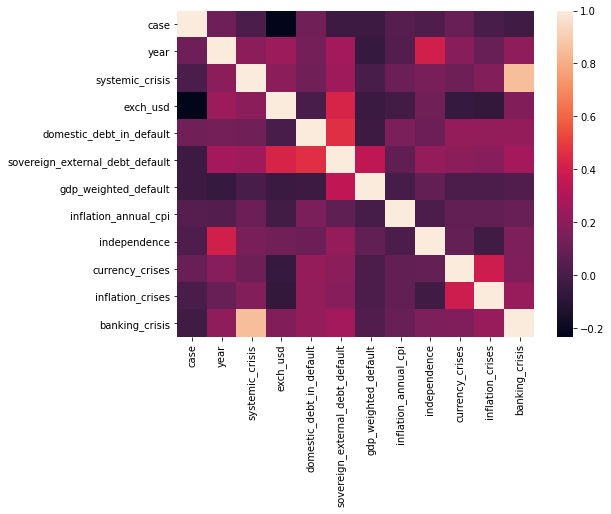

In [15]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr())

### COUNTRIES' EXCHANGE RATES BY YEAR

Taking an indepth look at each contries' exchange rate over the years. The below collection of charts enable us to view the overall trends of movement in exchange rates for each country. 

A line of demarcation has been added to indicate when each country became independent. This will be helpful in determining if indendence had any impact on the exchange rate.

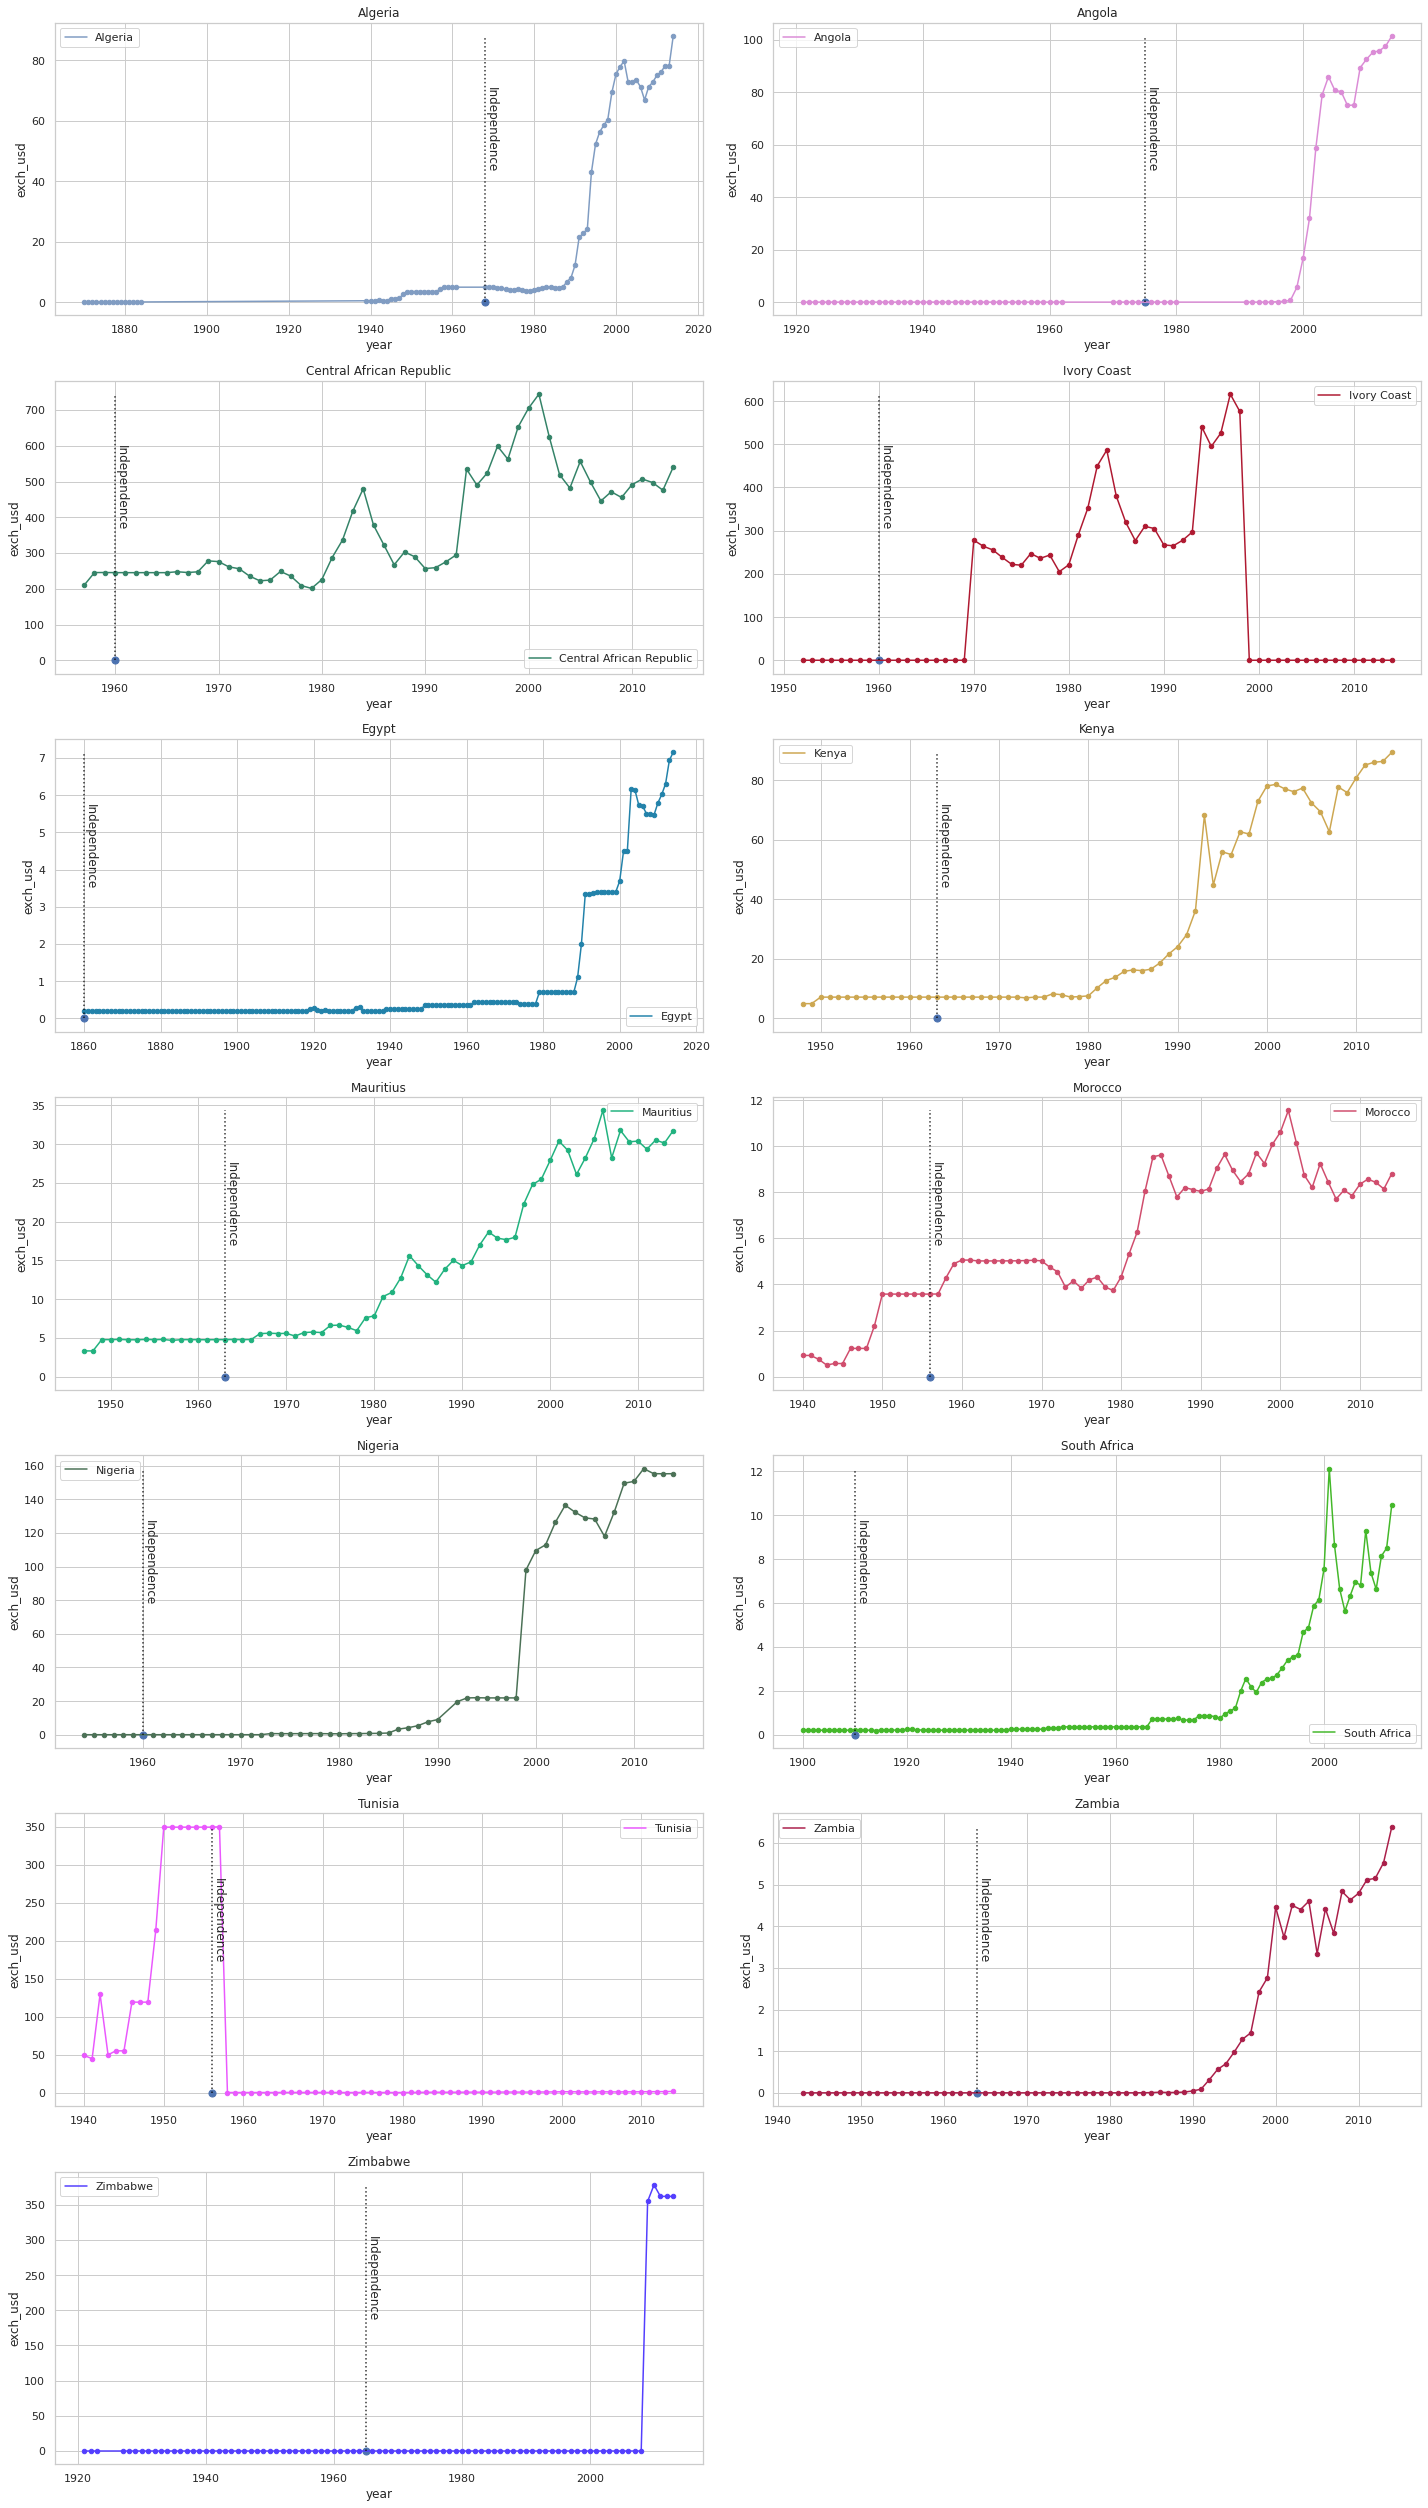

In [16]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,35))
plt.title('Exchange Rates of Countries')
plot_number=1

for country in unique_countries:
    plt.subplot(7,2,plot_number)
    plot_number+=1
    color ="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    
    plt.scatter(df[df.country==country]['year'],
                df[df.country==country]['exch_usd'],
                color=color,
                s=20)
    
    sns.lineplot(df[df.country==country]['year'],
                 df[df.country==country]['exch_usd'],
                 label=country,
                 color=color)
    
    plt.plot([np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
              np.min(df[np.logical_and(df.country==country,df.independence==1)]['year'])],
             [0, np.max(df[df.country==country]['exch_usd'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    
    plt.text(np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
             np.max(df[df.country==country]['exch_usd'])/2,
             'Independence',
             rotation=-90)
    
    plt.scatter(x=np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
                y=0,
                s=50)
    
    plt.title(country)
    
plt.tight_layout()
plt.show()


#### OBSERVATIONS

The majority of countries display an upward trend of exchange rates starting in the latter half of the 20th century.

Ivory Coast shows a dramatic decrease in the late 1990s. The same can be said for Tunisia in the late 1950s.

<hr>

### COUNTRIES' ANNUAL INFLATION RATE BY YEAR

Taking an indepth look at each contries' inflation rate over the years. The below collection of charts enable us to view the overall trends of movement in inflation rates for each country. 

A line of demarcation has been added to indicate when each country became independent. This will be helpful in determining if indendence had any impact on the inflation rate. 

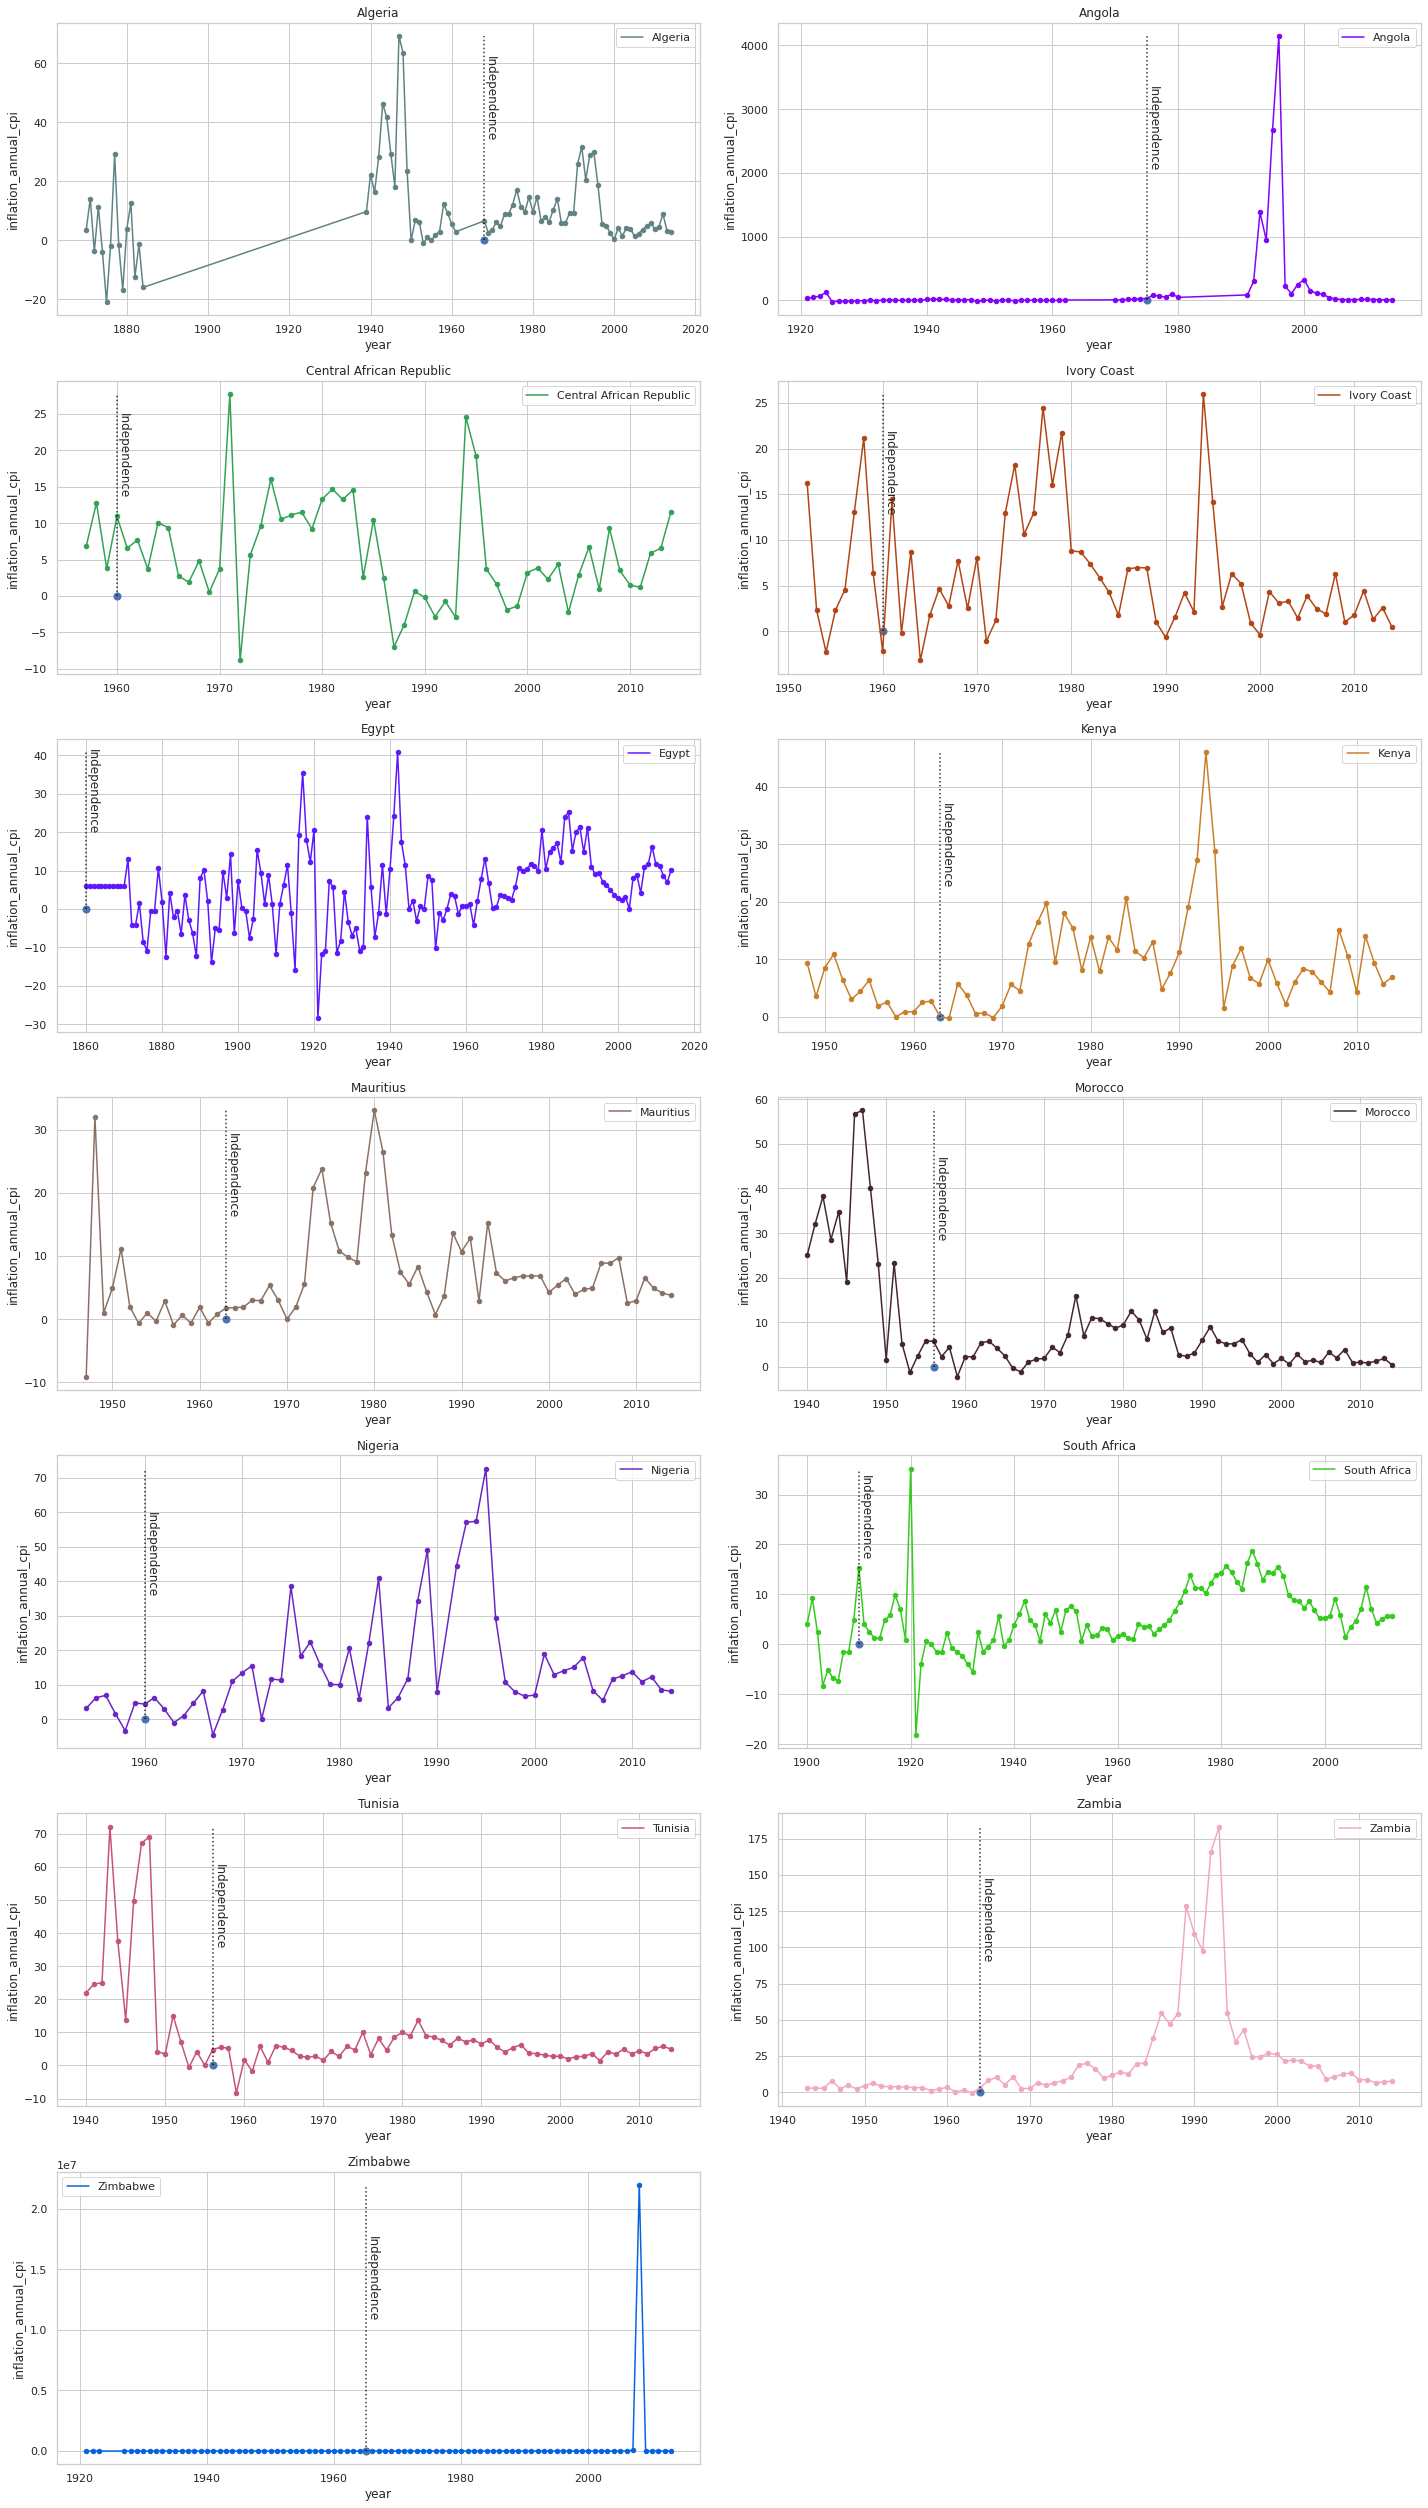

In [17]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,35))
plot_number=1

for country in unique_countries:
    plt.subplot(7,2,plot_number)
    plot_number+=1
    color ="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    
    plt.scatter(df[df.country==country]['year'],
                df[df.country==country]['inflation_annual_cpi'],
                color=color,
                s=20)
    
    sns.lineplot(df[df.country==country]['year'],
                 df[df.country==country]['inflation_annual_cpi'],
                 label=country,
                 color=color)
    
    plt.plot([np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
              np.min(df[np.logical_and(df.country==country,df.independence==1)]['year'])],
             [0, np.max(df[df.country==country]['inflation_annual_cpi'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    
    plt.text(np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
             np.max(df[df.country==country]['inflation_annual_cpi'])/2,
             'Independence',
             rotation=-90)
    
    plt.scatter(x=np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
                y=0,
                s=50)
    
    plt.title(country)
    
plt.tight_layout()
plt.show()

### DEBT AND CRISIS TRACKER

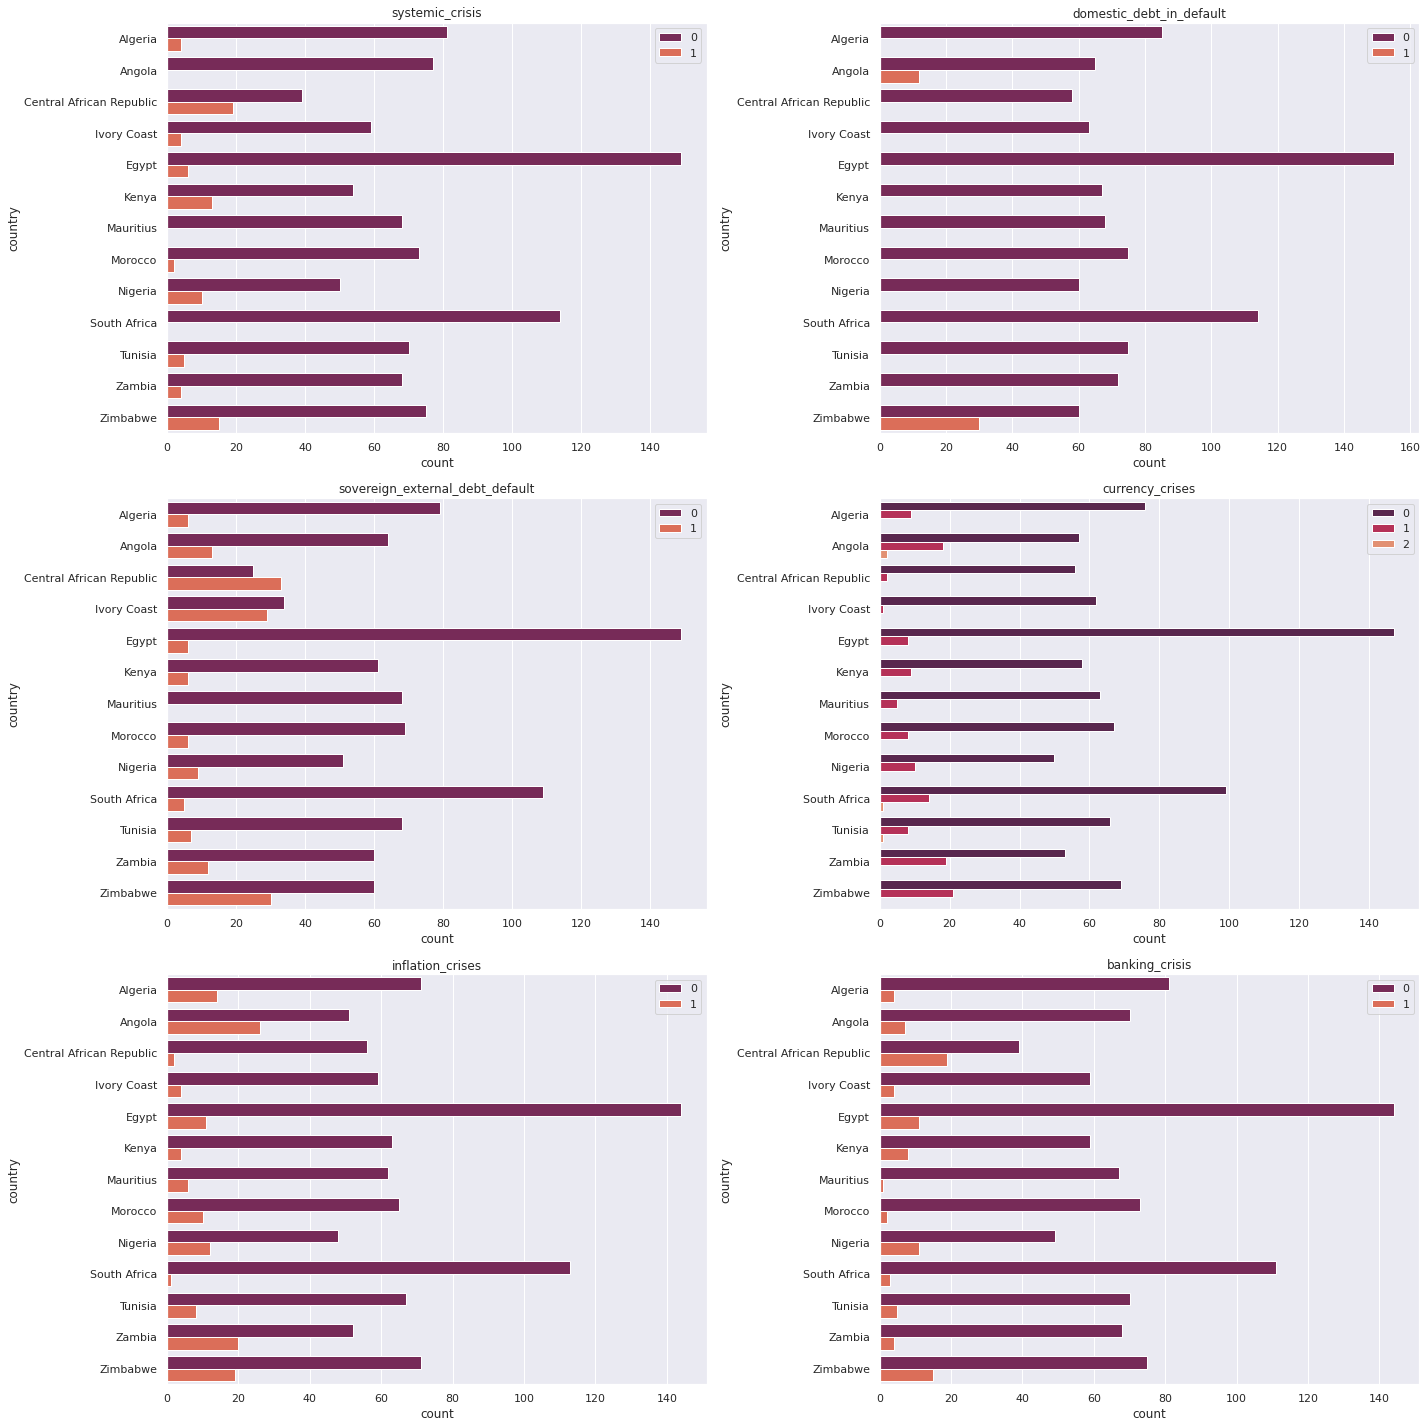

In [18]:
sns.set(style='darkgrid')
cols=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises','banking_crisis']
plt.figure(figsize=(20,20))
plot_num=1

for col in cols:
    plt.subplot(3,2,plot_num)
    plot_num+=1
    
    sns.countplot(y=df.country,hue=df[col],palette='rocket')
    
    plt.legend(loc=0)
    plt.title(col)
    
plt.tight_layout()
plt.show()

## SYSTEMIC CRISES CORRELATIONS

We will take a closer look at the three countries with the highest values in each of the above crisis categories.

Using line plots and scatter plots we'll make a visual comparison to determine if there may be a correlation with systemic crises. 

Each crisis category -- domestic debt, external debt, currency crisis, inflation crisis, and banking crisis -- will be represented by a line plot, while the sytemic crisis will be represented with orange scatter plots. 

The amount of overlap between the two will help indicate the type of correlation between each variable. A value of '1' means that a crisis was present, while a value of '0' means that no crisis was present.

### SYSTEMIC CRISIS VS BANKING CRISIS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

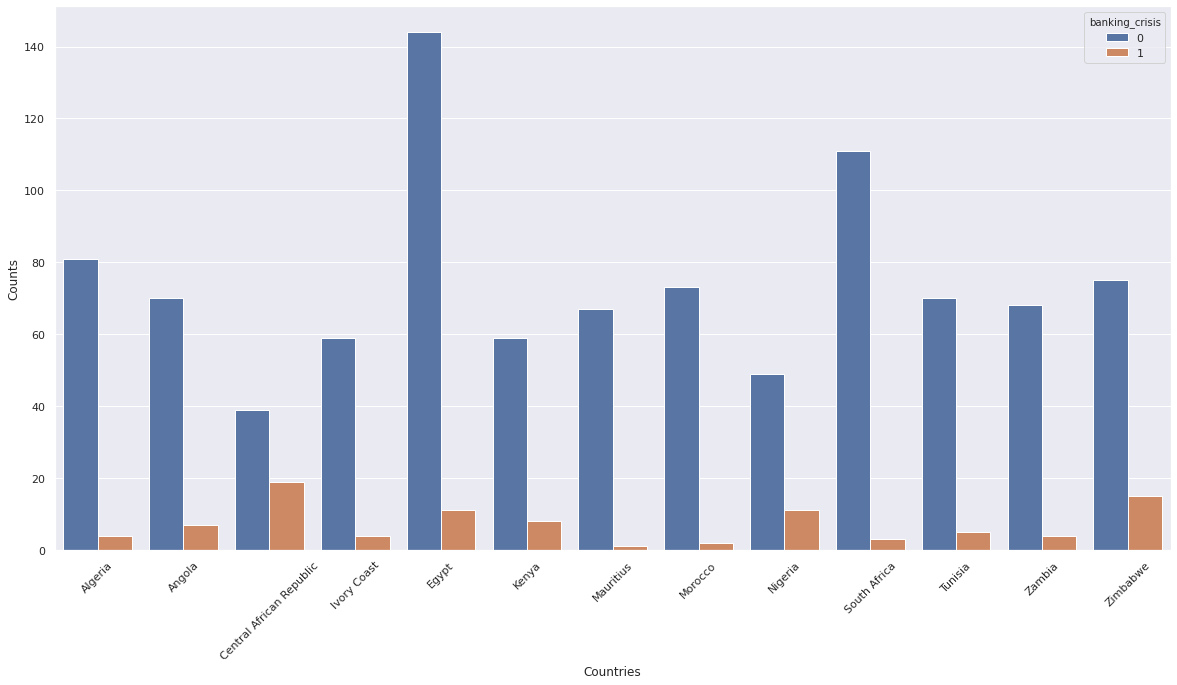

In [19]:
fig,ax = plt.subplots(figsize=(20,10))

sns.countplot(df['country'],hue=df['banking_crisis'],ax=ax)

plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

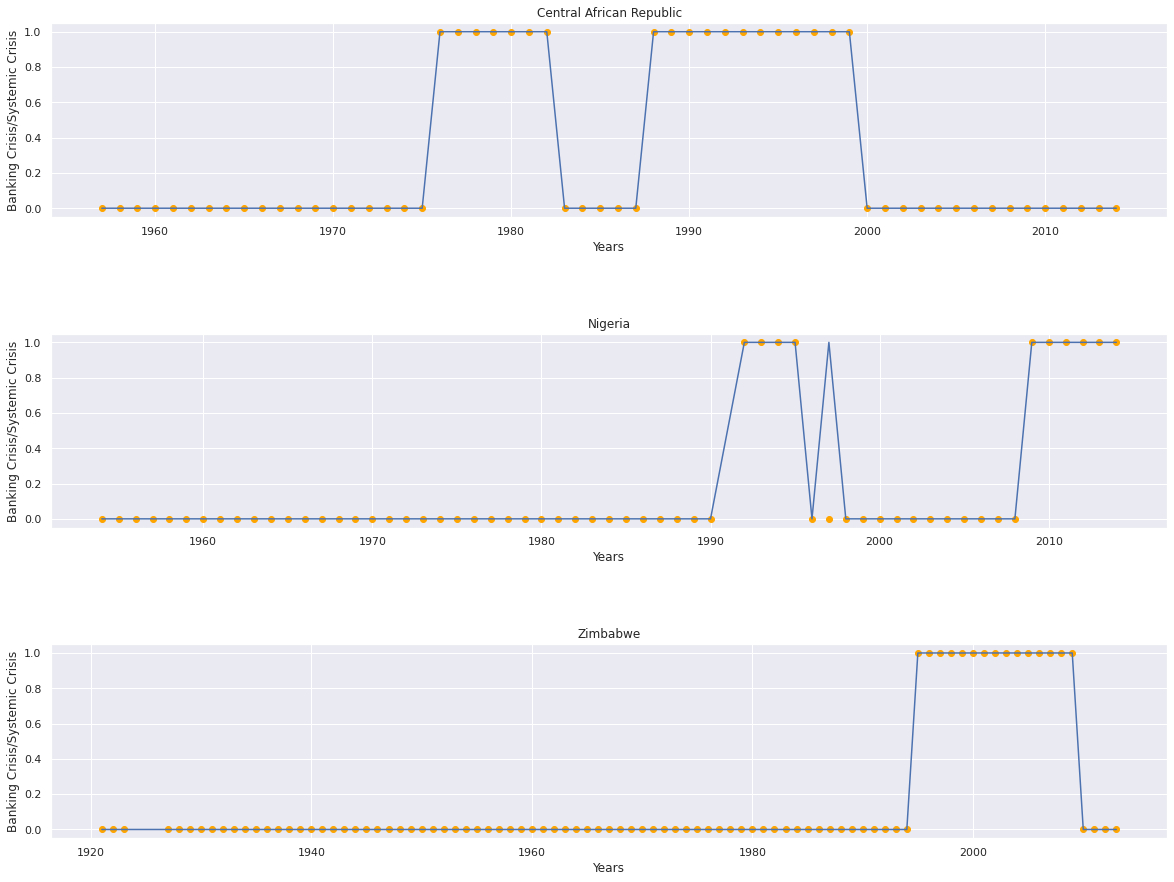

In [20]:
banking = df[['year', 'country', 'systemic_crisis', 'banking_crisis']]
banking = banking[(banking['country'] == 'Central African Republic') | 
                    (banking['country'] == 'Nigeria') | (banking['country'] == 'Zimbabwe')]

plt.figure(figsize=(20,15))
count=1

for country in banking.country.unique():
    plt.subplot(len(banking.country.unique()), 1, count)
    subset = banking[(banking['country'] == country)]
    
    sns.lineplot(subset['year'], subset['banking_crisis'])
    plt.scatter(subset['year'], subset['systemic_crisis'], color='orange', label='Systemic Crisis')
    
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Banking Crisis/Systemic Crisis')
    plt.title(country)
    count+=1

#### OBSERVATIONS

There appears to be a significant overlap between banking crisis and systemic crisis. In all instances except for one in the country of Nigeria, where there was a banking crisis a systemic crisis was also present.

### DOMESTIC DEBT IN DEFAULT VS SYSTEMIC CRISIS



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

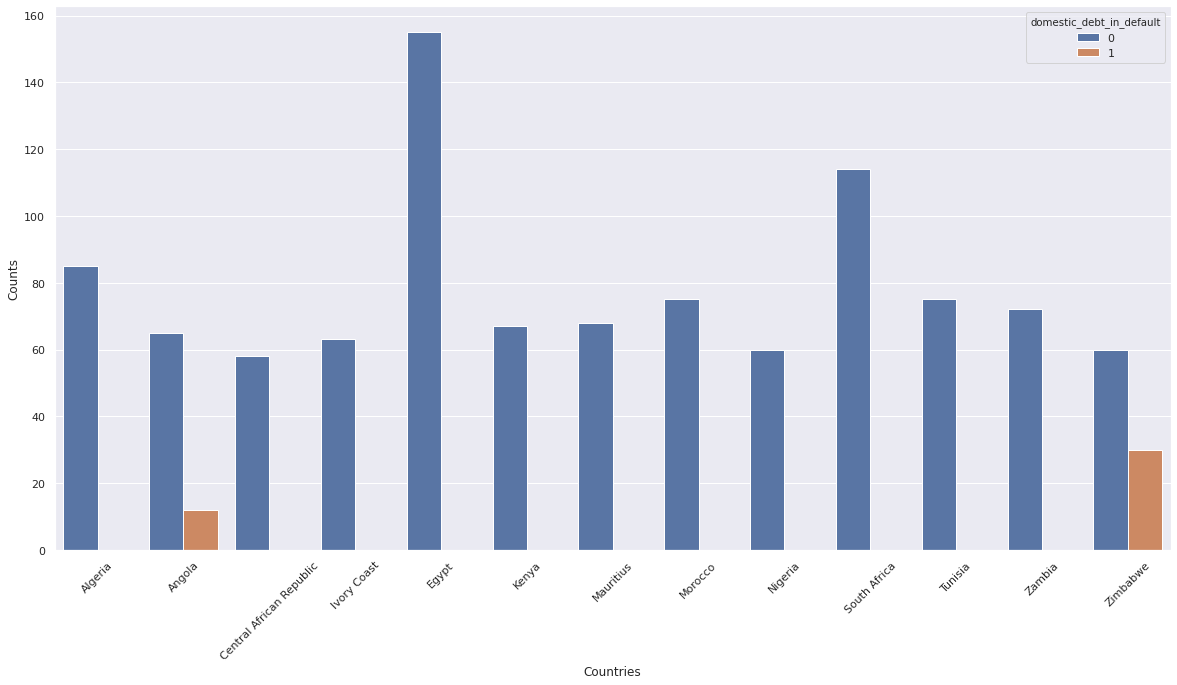

In [21]:
fig,ax = plt.subplots(figsize=(20,10))

sns.countplot(df['country'],hue=df['domestic_debt_in_default'],ax=ax)

plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

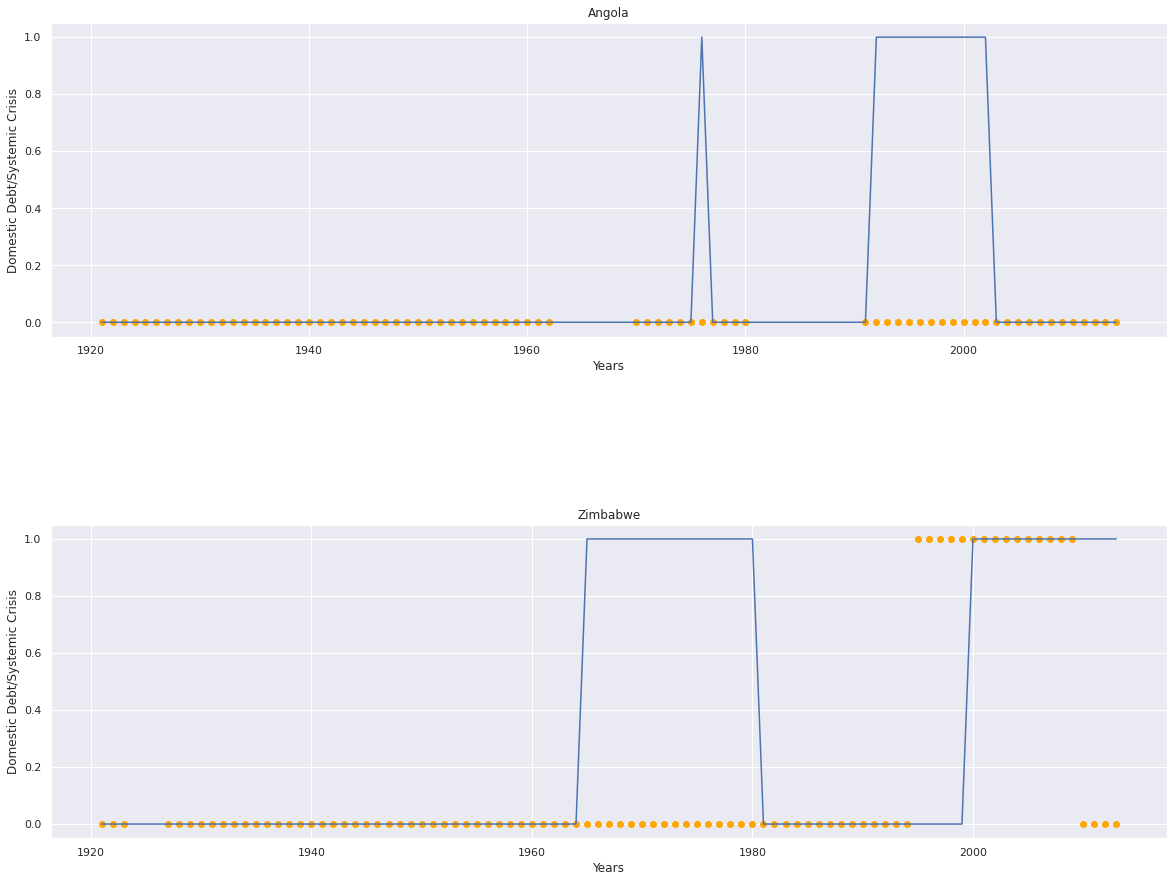

In [22]:
domestic_debt = df[['year', 'country', 'domestic_debt_in_default', 'systemic_crisis']]
domestic_debt = domestic_debt[(domestic_debt['country'] == 'Angola') | (domestic_debt['country'] == 'Zimbabwe')]

plt.figure(figsize=(20,15))
count=1

for country in domestic_debt.country.unique():
    plt.subplot(len(domestic_debt.country.unique()), 1, count)
    subset = domestic_debt[(domestic_debt['country'] == country)]
    
    sns.lineplot(subset['year'], subset['domestic_debt_in_default'])
    plt.scatter(subset['year'], subset['systemic_crisis'], color='orange', label='Systemic Crisis')
    
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Domestic Debt/Systemic Crisis')
    plt.title(country)
    count+=1

#### OBSERVATIONS: 

With the exception of Zimbabwe in the early 2000s, there are very few instances of overlap between domestic debt in default and systemic crisis. While they both display a value of '0' throughout the majority of the timeline, in the instances where domestic debt in default is present a systemic crisis does not follow automatically. This indicates that domestic debt in default is not necessarily a causing factor of systemic crisis.

### SOVEREIGN EXTERNAL DEBT VS SYSTEMIC CRISIS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

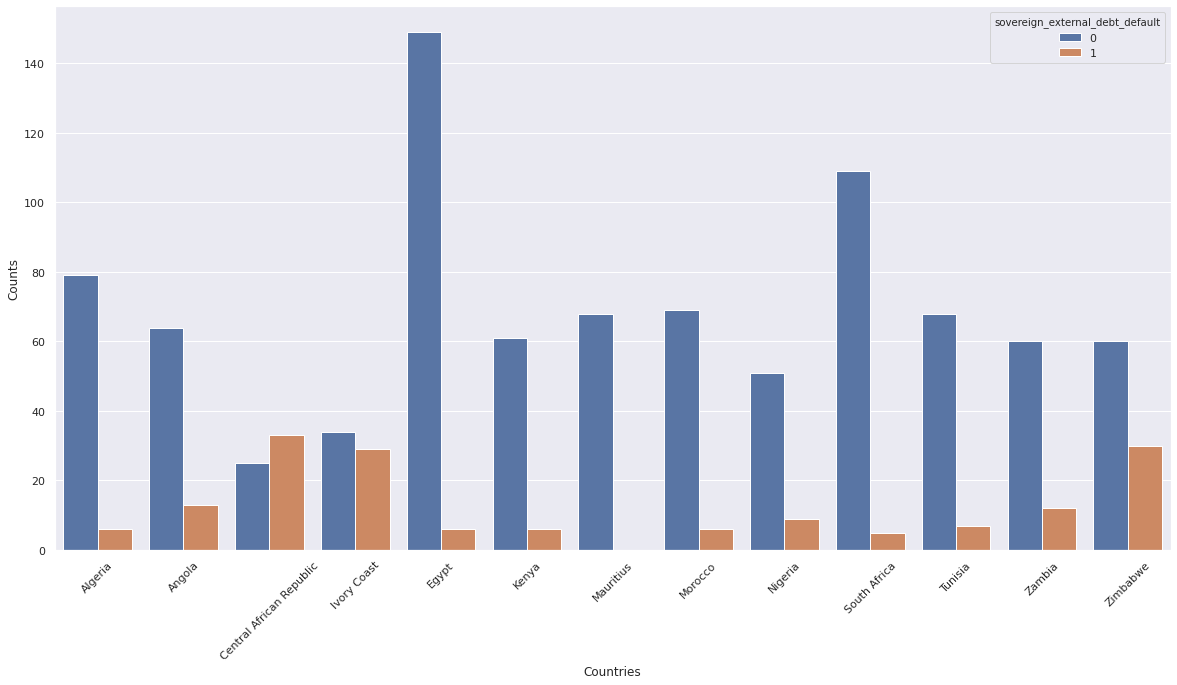

In [23]:
fig,ax = plt.subplots(figsize=(20,10))

sns.countplot(df['country'],hue=df['sovereign_external_debt_default'],ax=ax)

plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

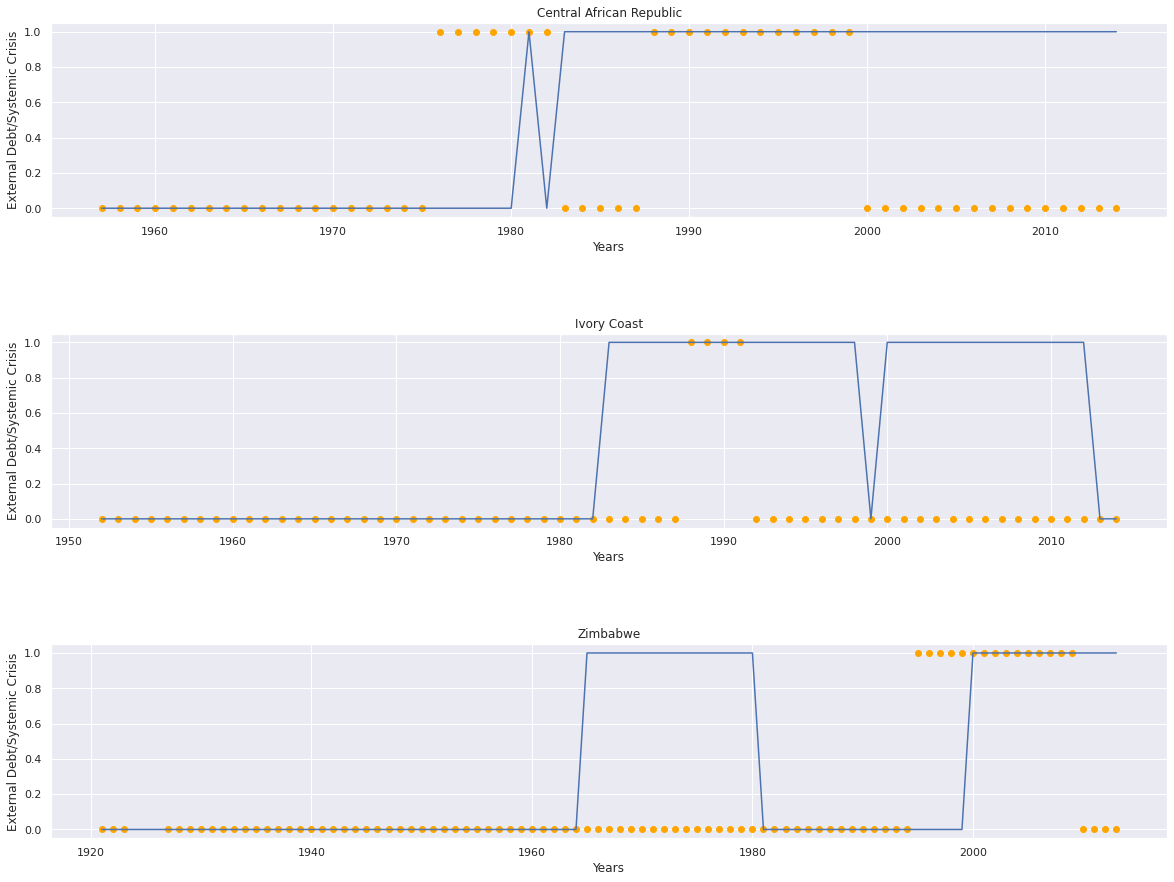

In [24]:
external_debt = df[['year', 'country', 'sovereign_external_debt_default', 'systemic_crisis']]
external_debt = external_debt[(external_debt['country'] == 'Central African Republic') | 
                              (external_debt['country'] == 'Ivory Coast') |
                              (external_debt['country'] == 'Zimbabwe')]

plt.figure(figsize=(20,15))
count=1

for country in external_debt.country.unique():
    plt.subplot(len(external_debt.country.unique()), 1, count)
    subset = external_debt[(external_debt['country'] == country)]
    
    sns.lineplot(subset['year'], subset['sovereign_external_debt_default'])
    plt.scatter(subset['year'], subset['systemic_crisis'], color='orange', label='Systemic Crisis')
    
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('External Debt/Systemic Crisis')
    plt.title(country)
    count+=1

### CURRENCY CRISES VS BANKING CRISIS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

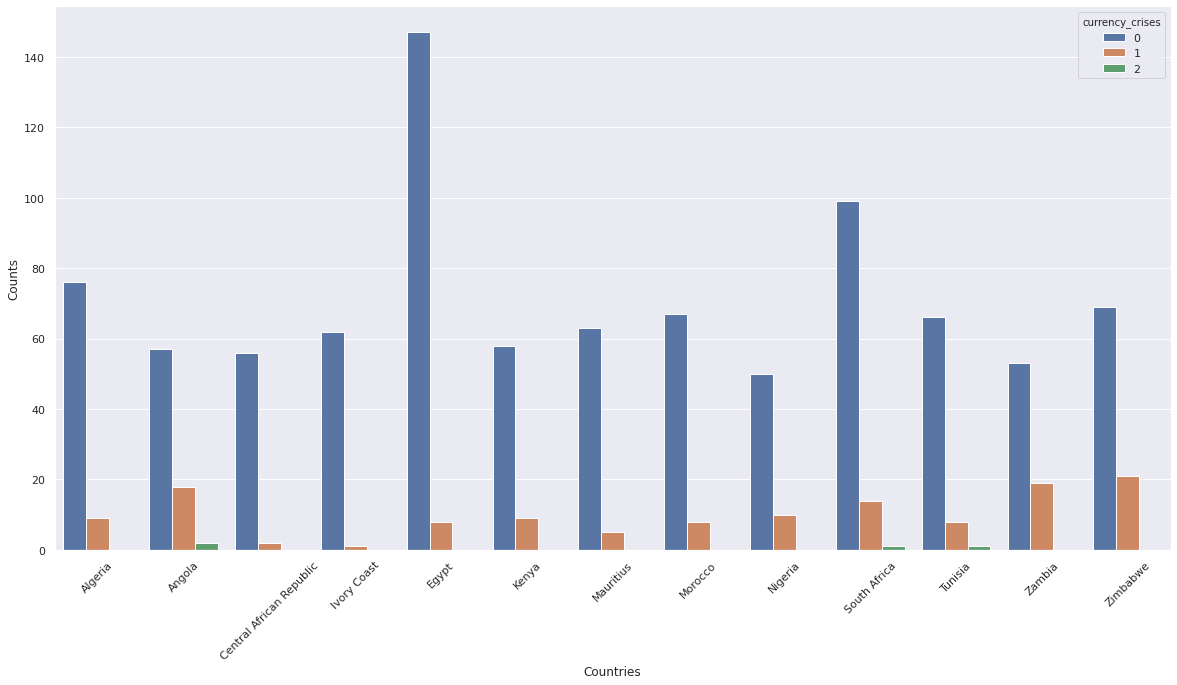

In [25]:
fig,ax = plt.subplots(figsize=(20,10))

sns.countplot(df['country'],hue=df['currency_crises'],ax=ax)

plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

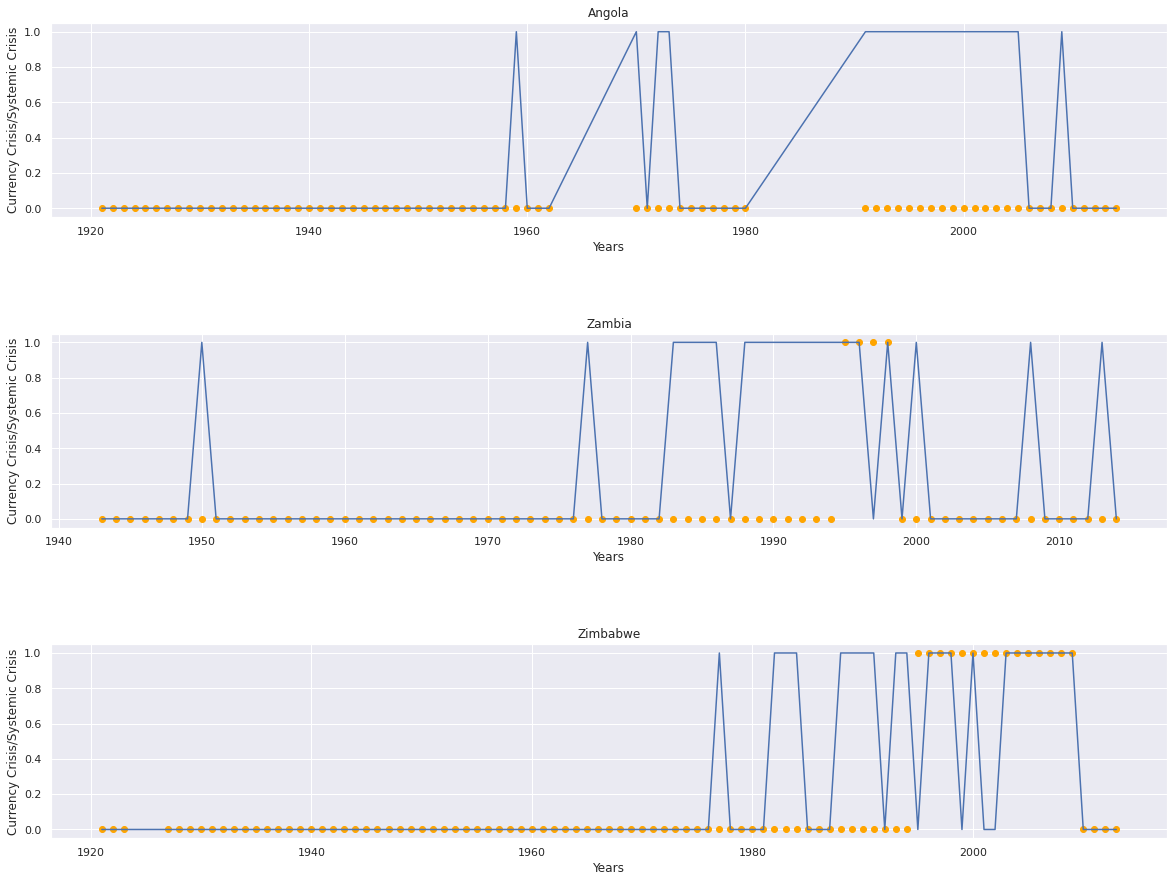

In [26]:
currency = df[['year', 'country', 'currency_crises', 'systemic_crisis']]
currency = currency[(currency['country'] == 'Angola') | 
                              (currency['country'] == 'Zambia') |
                              (currency['country'] == 'Zimbabwe')]
currency = currency.replace(to_replace=2, value=1, regex=False)


plt.figure(figsize=(20,15))
count=1

for country in currency.country.unique():
    plt.subplot(len(currency.country.unique()), 1, count)
    subset = currency[(currency['country'] == country)]
    
    sns.lineplot(subset['year'], subset['currency_crises'])
    plt.scatter(subset['year'], subset['systemic_crisis'], color='orange', label='Systemic Crisis')
    
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Currency Crisis/Systemic Crisis')
    plt.title(country)
    count+=1

### INFLATION CRISES VS BANKING CRISIS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

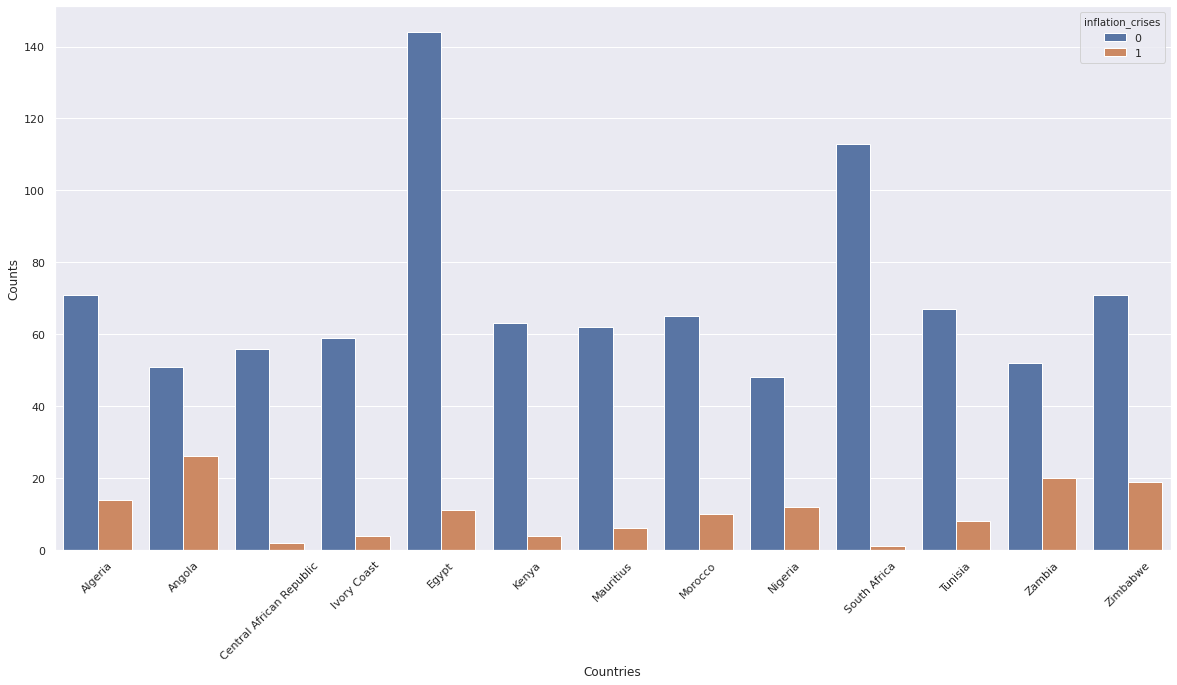

In [27]:
fig,ax = plt.subplots(figsize=(20,10))

sns.countplot(df['country'],hue=df['inflation_crises'],ax=ax)

plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

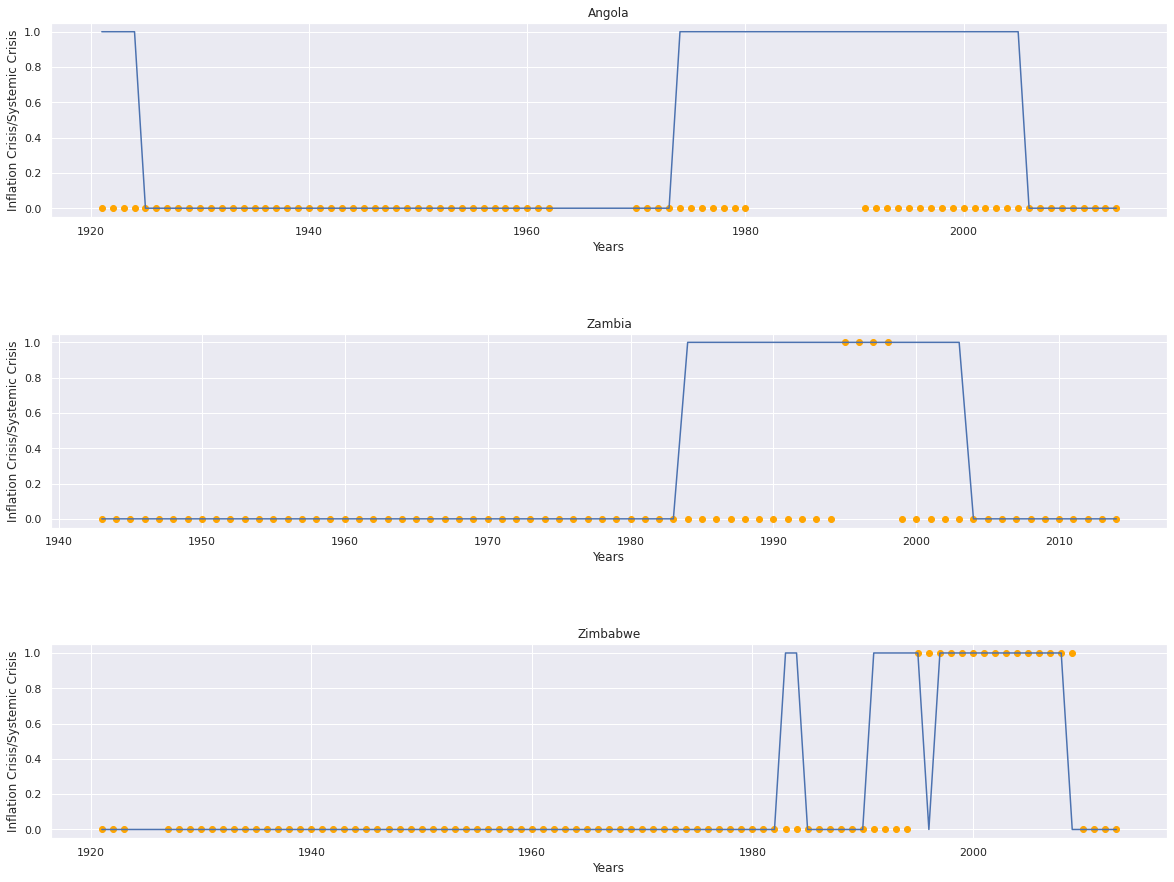

In [28]:
inflation = df[['year', 'country', 'inflation_crises', 'systemic_crisis']]
inflation = inflation[(inflation['country'] == 'Angola') | 
                              (inflation['country'] == 'Zambia') |
                              (inflation['country'] == 'Zimbabwe')]

plt.figure(figsize=(20,15))
count=1

for country in inflation.country.unique():
    plt.subplot(len(inflation.country.unique()), 1, count)
    subset = inflation[(inflation['country'] == country)]
    
    sns.lineplot(subset['year'], subset['inflation_crises'])
    plt.scatter(subset['year'], subset['systemic_crisis'], color='orange', label='Systemic Crisis')
    
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Inflation Crisis/Systemic Crisis')
    plt.title(country)
    count+=1

# <a id='5'>CONCLUSION</a>

While banking crisis and systemic crisis are very strongly correlated, no other individual crisis or economic phenomenon such as debt in default can be solely linked to the presence of a systemic crisis. Using a different model, we may be able to determine which factors are more strongly related to systemic crisis. 

I will circle back to this kernel at a later date to do some data modeling and predictive analysis. 

Thanks for stopping by!